In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from typing import Dict, List
from unidecode import unidecode

# Loading rosters

In [8]:
team_wings_2019=['Luke Glendening', 'Andreas Athanasiou', 'Dylan Larkin', 'Tyler Bertuzzi', 'Frans Nielsen', 'Justin Abdelkader', 'Anthony Mantha', 'Thomas Vanek', 'Darren Helm', 'Jacob de La Rose', 'Martin Frk', 'Wade Megan', 'Niklas Kronwall', 'Danny DeKeyser', 'Jonathan Ericsson', 'Trevor Daley', 'Mike Green', 'Luke Witkowski']
team_wings_goalies_2019=['Jimmy Howard', 'Jonathan Bernier']
team_bruins_2019=['David Krejčí', 'Brad Marchand', 'Danton Heinen', 'Chris Wagner', 'Noel Acciari', 'Sean Kuraly', 'David Backes', 'Joakim Nordström', 'Jake DeBrusk', 'David Pastrňák', 'Patrice Bergeron', 'Jakob Forsbacka Karlsson', 'Brandon Carlo', 'Matt Grzelcyk', 'Torey Krug', 'Zdeno Chára', 'John Moore', 'Charlie McAvoy']
team_bruins_goalies_2019=['Tuukka Rask', 'Jaroslav Halák']
team_colorado_2019=['Matt Calvert', 'Nathan MacKinnon', 'Carl Söderberg', 'Alexander Kerfoot', 'Mikko Rantanen', 'Gabriel Landeskog', 'Tyson Jost', 'J.T. Compher', 'Colin Wilson', 'Sven Andrighetto', 'Matthew Nieto', 'Gabriel Bourque', 'Samuel Girard', 'Erik Johnson', 'Tyson Barrie', 'Patrik Nemeth', 'Ian Cole', 'Nikita Zadorov']
team_colorado_goalies_2019=['Semyon Varlamov', 'Philipp Grubauer']
team_hurricanes_2019=['Sebastian Aho', 'Jordan Martinook', 'Brock McGinn', 'Teuvo Teräväinen', 'Justin Williams', 'Lucas Wallmark', 'Warren Foegele', 'Micheal Ferland', 'Jordan Staal', 'Greg McKegg', 'Janne Kuokkanen', 'Martin Nečas', 'Justin Faulk', 'Dougie Hamilton', 'Jaccob Slavin', 'Trevor van Riemsdyk', 'Calvin de Haan', 'Brett Pesce']
team_hurricanes_goalies_2019=['Petr Mrázek', 'Curtis McElhinney']
team_canadiens_2019=['Max Domi', 'Brendan Gallagher', 'Artturi Lehkonen', 'Phillip Danault', 'Jonathan Drouin', 'Tomáš Tatar', 'Andrew Shaw', 'Joel Armia', 'Paul Byron', 'Nicolas Deslauriers', 'Matthew Peca', 'Michael Chaput', 'Jeff Petry', 'Jordie Benn', 'Victor Mete', 'Shea Weber', 'Brett Kulak', 'Mike Reilly']
team_canadiens_goalies_2019=['Carey Price', 'Antti Niemi']
team_kings_2019=['Alex Iafallo', 'Tyler Toffoli', 'Adrian Kempe', 'Anže Kopitar', 'Jeff Carter', 'Dustin Brown', 'Kyle Clifford', 'Ilya Kovalchuk', 'Trevor Lewis', 'Michael Amadio', 'Jonny Brodzinski', 'Nikita Scherbak', 'Drew Doughty', 'Derek Forbort', 'Dion Phaneuf', 'Alec Martinez', 'Paul Ladue', 'Kurtis MacDermid']
team_kings_goalies_2019=['Jonathan Quick', 'Jack Campbell']
team_jackets_2019=['Josh Anderson', 'Pierre-Luc Dubois', 'Cam Atkinson', 'Artemi Panarin', 'Riley Nash', 'Oliver Bjorkstrand', 'Boone Jenner', 'Alexander Wennberg', 'Nick Foligno', 'Brandon Dubinsky', 'Lukáš Sedlák', 'Markus Hännikäinen', 'David Savard', 'Zach Werenski', 'Markus Nutivaara', 'Seth Jones', 'Scott Harrington', 'Ryan Murray']
team_jackets_goalies_2019=['Sergei Bobrovsky', 'Joonas Korpisalo']
team_rangers_2019=['Mika Zibanejad', 'Jimmy Vesey', 'Chris Kreider', 'Vladislav Namestnikov', 'Filip Chytil', 'Jesper Fast', 'Pavel Buchnevich', 'Boo Nieves', 'Lias Andersson', 'Vinni Lettieri', 'Connor Brickley', 'Steven Fogarty', 'Marc Staal', 'Brady Skjei', 'Neal Pionk', 'Kevin Shattenkirk', 'Brendan Smith', 'Anthony DeAngelo']
team_rangers_goalies_2019=['Henrik Lundqvist', 'Alexandar Georgiev']
team_flames_2019=['Johnny Gaudreau', 'Elias Lindholm', 'Derek Ryan', 'Matthew Tkachuk', 'Mark Jankowski', 'Sean Monahan', 'Mikael Backlund', 'Garnet Hathaway', 'Sam Bennett', 'Michael Frolík', 'James Neal', 'Austin Czarnik', 'Noah Hanifin', 'Rasmus Andersson', 'T.J. Brodie', 'Mark Giordano', 'Travis Hamonic', 'Oliver Kylington']
team_flames_goalies_2019=['David Rittich', 'Mike Smith']
team_blackhawks_2019=['Alex DeBrincat', 'Jonathan Toews', 'Patrick Kane', 'Brandon Saad', 'Artem Anisimov', 'Marcus Krüger', 'David Kämpf', 'Chris Kunitz', 'John Hayden', 'Dylan Sikura', 'Andreas Martinsen', 'Duncan Keith', 'Erik Gustafsson', 'Brent Seabrook', 'Connor Murphy', 'Gustav Forsling', 'Carl Dahlström', 'Brandon Davidson']
team_blackhawks_goalies_2019=['Corey Crawford', 'Cam Ward']
team_coyotes_2019=['Clayton Keller', 'Nick Cousins', 'Lawson Crouse', 'Richard Pánik', 'Alex Galchenyuk', 'Vinnie Hinostroza', 'Derek Stepan', 'Christian Fischer', 'Josh Archibald', 'Brad Richardson', 'Mario Kempe', 'Michael Grabner', 'Niklas Hjalmarsson', 'Oliver Ekman-Larsson', 'Alex Goligoski', 'Jordan Oesterle', 'Jakob Chychrun', 'Kevin Connauton']
team_coyotes_goalies_2019=['Darcy Kuemper', 'Adin Hill']
team_predators_2019=['Nick Bonino', 'Ryan Johansen', 'Calle Järnkrok', 'Craig Smith', 'Colton Sissons', 'Filip Forsberg', 'Viktor Arvidsson', 'Frédérick Gaudreau', 'Kyle Turris', 'Rocco Grimaldi', 'Miikka Salomäki', 'Austin Watson', 'Ryan Ellis', 'Roman Josi', 'Mattias Ekholm', 'P.K. Subban', 'Yannick Weber', 'Dan Hamhuis']
team_predators_goalies_2019=['Pekka Rinne', 'Juuse Saros']
team_penguins_2019=['Jake Guentzel', 'Phil Kessel', 'Sidney Crosby', 'Bryan Rust', 'Matt Cullen', 'Dominik Simon', 'Patric Hörnqvist', 'Evgeni Malkin', 'Garrett Wilson', 'Zach Aston-Reese', 'Jack Johnson', 'Brian Dumoulin', 'Kris Letang', 'Olli Määttä', 'Justin Schultz', 'Chad Ruhwedel', 'Zach Trotman']
team_penguins_goalies_2019=['Matt Murray', 'Casey DeSmith']
team_capitals_2019=['Jakub Vrána', 'Brett Connolly', 'Lars Eller', 'Alex Ovechkin', 'Nicklas Bäckström', 'André Burakovsky', 'Evgeny Kuznetsov', 'T.J. Oshie', 'Nic Dowd', 'Chandler Stephenson', 'Tom Wilson', 'Devante Smith-Pelly', 'Dmitry Orlov', 'John Carlson', 'Matt Niskanen', 'Michal Kempný', 'Brooks Orpik', 'Christian Djoos']
team_capitals_goalies_2019=['Braden Holtby', 'Pheonix Copley']
team_canucks_2019=['Bo Horvat', 'Loui Eriksson', 'Markus Granlund', 'Tyler Motte', 'Jake Virtanen', 'Brock Boeser', 'Antoine Roussel', 'Nikolay Goldobin', 'Jay Beagle', 'Adam Gaudette', 'Tim Schaller', 'Sven Baertschi', 'Troy Stecher', 'Ben Hutton', 'Derrick Pouliot', 'Alexander Edler', 'Chris Tanev', 'Alex Biega']
team_canucks_goalies_2019=['Jacob Markström', 'Thatcher Demko']
team_islanders_2019=['Josh Bailey', 'Mathew Barzal', 'Leo Komarov', 'Anders Lee', 'Brock Nelson', 'Anthony Beauvillier', 'Jordan Eberle', 'Casey Cizikas', 'Cal Clutterbuck', 'Valtteri Filppula', 'Matt Martin', 'Tom Kühnhackl', 'Nick Leddy', 'Ryan Pulock', 'Scott Mayfield', 'Adam Pelech', 'Johnny Boychuk', 'Thomas Hickey']
team_islanders_goalies_2019=['Robin Lehner', 'Thomas Greiss']
team_flyers_2019=['Claude Giroux', 'Travis Konecny', 'Scott Laughton', 'Oskar Lindblom', 'Sean Couturier', 'Jakub Voráček', 'Nolan Patrick', 'Michael Raffl', 'James van Riemsdyk', 'Phil Varone', 'Jori Lehterä', 'Corban Knight', 'Robert Hägg', 'Ivan Provorov', 'Travis Sanheim', 'Shayne Gostisbehere', 'Radko Gudas', 'Andrew MacDonald']
team_flyers_goalies_2019=['Brian Elliott', 'Michal Neuvirth']
team_blues_2019=["Ryan O'Reilly", 'Ivan Barbashev', 'Vladimir Tarasenko', 'Pat Maroon', 'Oskar Sundqvist', 'Tyler Bozak', 'Brayden Schenn', 'Jaden Schwartz', 'Alexander Steen', 'Zach Sanford', 'David Perron', 'Sammy Blais', 'Colton Parayko', 'Jay Bouwmeester', 'Vince Dunn', 'Alex Pietrangelo', 'Joel Edmundson', 'Robert Bortuzzo']
team_blues_goalies_2019=['Jake Allen', 'Jordan Binnington']
team_panthers_2019=['Aleksander Barkov', 'Evgenii Dadonov', 'Mike Hoffman', 'Jonathan Huberdeau', 'Frank Vatrano', 'Troy Brouwer', 'Colton Sceviour', 'Vincent Trocheck', 'Henrik Borgström', 'Denis Malgin', 'Dryden Hunt', 'Jamie McGinn', 'Aaron Ekblad', 'Keith Yandle', 'Mike Matheson', 'Mark Pysyk', 'MacKenzie Weegar', 'Ian McCoshen']
team_panthers_goalies_2019=['Roberto Luongo', 'James Reimer']
team_wild_2019=['Marcus Foligno', 'Jordan Greenway', 'Eric Staal', 'Jason Zucker', 'Zach Parise', 'Eric Fehr', 'Joel Eriksson Ek', 'J.T. Brown', 'Luke Kunin', 'Mikko Koivu', 'Matt Read', 'Kyle Rau', 'Jonas Brodin', 'Jared Spurgeon', 'Ryan Suter', 'Greg Pateryn', 'Nick Seeler', 'Mathew Dumba']
team_wild_goalies_2019=['Devan Dubnyk', 'Alex Stalock']
team_knights_2019=['William Karlsson', 'Jonathan Marchessault', 'Ryan Reaves', 'Cody Eakin', 'Pierre-Édouard Bellemare', 'Reilly Smith', 'Alex Tuch', 'Ryan Carpenter', 'Tomáš Nosek', 'Max Pacioretty', 'William Carrier', 'Paul Stastny', 'Brayden McNabb', 'Shea Theodore', 'Deryk Engelland', 'Colin Miller', 'Nick Holden', 'Nate Schmidt']
team_knights_goalies_2019=['Marc-André Fleury', 'Malcolm Subban']
team_dallas_2019=['Tyler Seguin', 'Radek Faksa', 'Mattias Janmark', 'Jamie Benn', 'Blake Comeau', 'Jason Spezza', 'Alexander Radulov', 'Jason Dickinson', 'Valeri Nichushkin', 'Brett Ritchie', 'Tyler Pitlick', 'Denis Gurianov', 'Esa Lindell', 'Roman Polák', 'John Klingberg', 'Taylor Fedun', 'Julius Honka', 'Joel Hanley']
team_dallas_goalies_2019=['Ben Bishop', 'Anton Khudobin']
team_oilers_2019=['Leon Draisaitl', 'Ryan Nugent-Hopkins', 'Zack Kassian', 'Milan Lucic', 'Connor McDavid', 'Alex Chiasson', 'Kyle Brodziak', 'Tobias Rieder', 'Jujhar Khaira', 'Ty Rattie', 'Jesse Puljujärvi', 'Kailer Yamamoto', 'Adam Larsson', 'Darnell Nurse', 'Kris Russell', 'Matt Benning', 'Oscar Klefbom', 'Kevin Gravel']
team_oilers_goalies_2019=['Mikko Koskinen']
team_sabres_2019=['Sam Reinhart', 'Jeff Skinner', 'Kyle Okposo', 'Conor Sheary', 'Jack Eichel', 'Casey Mittelstadt', 'Evan Rodrigues', 'Johan Larsson', 'Jason Pominville', 'Zemgus Girgensons', 'Vladimír Sobotka', 'Tage Thompson', 'Rasmus Ristolainen', 'Zach Bogosian', 'Marco Scandella', 'Jake McCabe', 'Casey Nelson', 'Matt Hunwick']
team_sabres_goalies_2019=['Carter Hutton', 'Linus Ullmark']
team_senators_2019=['Chris Tierney', 'Magnus Pääjärvi', 'Bobby Ryan', 'Mikkel Bødker', 'Colin White', 'Zack Smith', 'Jean-Gabriel Pageau', 'Tom Pyatt', 'Nick Paul', 'Max McCormick', 'Alex Formenton', 'Jack Rodewald', 'Dylan DeMelo', 'Cody Ceci', 'Thomas Chabot', 'Christián Jaroš', 'Mark Borowiecki', 'Ben Harpur']
team_senators_goalies_2019=['Craig Anderson', 'Mike Condon']
team_devils_2019=['Travis Zajac', 'Blake Coleman', 'Kyle Palmieri', 'Nico Hischier', 'Miles Wood', 'Pavel Zacha', 'Drew Stafford', 'Jesper Bratt', 'Stefan Noesen', 'Kevin Rooney', 'Taylor Hall', 'Kurtis Gabriel', 'Andy Greene', 'Damon Severson', 'Will Butcher', 'Mirco Müller', 'Sami Vatanen', 'Steven Santini']
team_devils_goalies_2019=['Keith Kinkaid', 'Cory Schneider']
team_sharks_2019=['Barclay Goodrow', 'Kevin Labanc', 'Logan Couture', 'Joonas Donskoi', 'Marcus Sorensen', 'Melker Karlsson', 'Timo Meier', 'Tomáš Hertl', 'Evander Kane', 'Joe Pavelski', 'Joe Thornton', 'Dylan Gambrell', 'Brent Burns', 'Brenden Dillon', 'Justin Braun', 'Marc-Édouard Vlasic', 'Erik Karlsson', 'Joakim Ryan']
team_sharks_goalies_2019=['Martin Jones', 'Aaron Dell']
team_leafs_2019=['Connor Brown', 'Patrick Marleau', 'Mitch Marner', 'John Tavares', 'Kasperi Kapanen', 'Andreas Johnsson', 'Nazem Kadri', 'Zach Hyman', 'Frederik Gauthier', 'Auston Matthews', 'William Nylander', 'Tyler Ennis', 'Morgan Rielly', 'Ron Hainsey', 'Nikita Zaitsev', 'Travis Dermott', 'Jake Gardiner', 'Martin Marinčin']
team_leafs_goalies_2019=['Frederik Andersen', 'Garret Sparks']
team_jets_2019=['Kyle Connor', 'Patrik Laine', 'Bryan Little', 'Mathieu Perreault', 'Mark Scheifele', 'Blake Wheeler', 'Brandon Tanev', 'Adam Lowry', 'Jack Roslovic', 'Andrew Copp', 'Nikolaj Ehlers', 'Jacob Trouba', 'Tyler Myers', 'Ben Chiarot', 'Josh Morrissey', 'Dmitry Kulikov', 'Dustin Byfuglien', 'Joseph Morrow']
team_jets_goalies_2019=['Connor Hellebuyck', 'Laurent Brossoit']
team_lightning_2019=['Anthony Cirelli', 'Alex Killorn', 'Nikita Kucherov', 'Steven Stamkos', 'Yanni Gourde', 'Tyler Johnson', 'Cédric Paquette', 'Brayden Point', 'J.T. Miller', 'Adam Erne', 'Ondřej Palát', 'Ryan Callahan', 'Ryan McDonagh', 'Mikhail Sergachev', 'Braydon Coburn', 'Victor Hedman', 'Dan Girardi', 'Anton Strålman']
team_lightning_goalies_2019=['Andrei Vasilevskiy', 'Louis Domingue']
team_ducks_2019=['Adam Henrique', 'Jakob Silfverberg', 'Rickard Rakell', 'Ryan Getzlaf', 'Carter Rowney', 'Ryan Kesler', 'Nick Ritchie', 'Troy Terry', 'Corey Perry', 'Ondřej Kaše', 'Ben Street', 'Kalle Kossila', 'Hampus Lindholm', 'Josh Manson', 'Cam Fowler', 'Jacob Larsson', 'Jaycob Megna', 'Andy Welinski']
team_ducks_goalies_2019=['John Gibson', 'Ryan Miller']


dict_teams_goalies_2019={'COL': team_colorado_goalies_2019, 'DAL': team_dallas_goalies_2019, 'ARI': team_coyotes_goalies_2019, 'NSH': team_predators_goalies_2019, 'STL': team_blues_goalies_2019, 'MIN': team_wild_goalies_2019, 'WPG': team_jets_goalies_2019, 'CHI': team_blackhawks_goalies_2019, 'VGK': team_knights_goalies_2019, 'VAN': team_canucks_goalies_2019, 'LAK': team_kings_goalies_2019, 'CGY': team_flames_goalies_2019, 'EDM': team_oilers_goalies_2019, 'ANA': team_ducks_goalies_2019, 'SJS': team_sharks_goalies_2019, 'BOS': team_bruins_goalies_2019, 'DET': team_wings_goalies_2019, 'MTL': team_canadiens_goalies_2019, 'TOR': team_leafs_goalies_2019, 'OTT': team_senators_goalies_2019, 'TBL': team_lightning_goalies_2019, 'FLA': team_panthers_goalies_2019, 'BUF': team_sabres_goalies_2019, 'PHI': team_flyers_goalies_2019, 'CBJ': team_jackets_goalies_2019, 'NYR': team_rangers_goalies_2019, 'CAR': team_hurricanes_goalies_2019, 'NJD': team_devils_goalies_2019, 'NYI': team_islanders_goalies_2019, 'PIT': team_penguins_goalies_2019, 'WSH': team_capitals_goalies_2019}
dict_teams_2019={'COL': team_colorado_2019, 'DAL': team_dallas_2019, 'ARI': team_coyotes_2019, 'NSH': team_predators_2019, 'STL': team_blues_2019, 'MIN': team_wild_2019, 'WPG': team_jets_2019, 'CHI': team_blackhawks_2019, 'VGK': team_knights_2019, 'VAN': team_canucks_2019, 'LAK': team_kings_2019, 'CGY': team_flames_2019, 'EDM': team_oilers_2019, 'ANA': team_ducks_2019, 'SJS': team_sharks_2019, 'BOS': team_bruins_2019, 'DET': team_wings_2019, 'MTL': team_canadiens_2019, 'TOR': team_leafs_2019, 'OTT': team_senators_2019, 'TBL': team_lightning_2019, 'FLA': team_panthers_2019, 'BUF': team_sabres_2019, 'PHI': team_flyers_2019, 'CBJ': team_jackets_2019, 'NYR': team_rangers_2019, 'CAR': team_hurricanes_2019, 'NJD': team_devils_2019, 'NYI': team_islanders_2019, 'PIT': team_penguins_2019, 'WSH': team_capitals_2019}

In [9]:
team_panthers_2022=['Jonathan Huberdeau', 'Eetu Luostarinen', 'Sam Reinhart', 'Carter Verhaeghe', 'Anthony Duclair', 'Sam Bennett', 'Aleksander Barkov', 'Patric Hörnqvist', 'Ryan Lomberg', 'Mason Marchment', 'Maxim Mamin', 'Joe Thornton', 'Brandon Montour', 'MacKenzie Weegar', 'Radko Gudas', 'Gustav Forsling', 'Aaron Ekblad', 'Lucas Carlsson']
team_panthers_goalies_2022=['Sergei Bobrovsky', 'Spencer Knight']
team_wild_2022=['Kevin Fiala', 'Ryan Hartman', 'Kirill Kaprizov', 'Joel Eriksson Ek', 'Frédérick Gaudreau', 'Marcus Foligno', 'Mats Zuccarello', 'Jordan Greenway', 'Nick Bjugstad', 'Kyle Rau', 'Joseph Cramarossa', 'Dmitry Kulikov', 'Jonas Brodin', 'Alex Goligoski', 'Jonathon Merrill', 'Jared Spurgeon', 'Mathew Dumba', 'Jordie Benn']
team_wild_goalies_2022=['Cam Talbot']
team_senators_2022=['Alex Formenton', 'Tim Stützle', 'Brady Tkachuk', 'Chris Tierney', 'Austin Watson', 'Joshua Norris', 'Connor Brown', 'Dylan Gambrell', 'Tyler Ennis', 'Drake Batherson', 'Parker Kelly', 'Colin White', 'Artem Zub', 'Nick Holden', 'Nikita Zaitsev', 'Thomas Chabot', 'Erik Brännström', 'Victor Mete']
team_senators_goalies_2022=['Anton Forsberg', 'Matt Murray']
team_bruins_2022=['Charlie Coyle', 'Taylor Hall', 'Erik Haula', 'Jake DeBrusk', 'Tomáš Nosek', 'Craig Smith', 'Patrice Bergeron', 'David Pastrňák', 'Curtis Lazar', 'Brad Marchand', 'Nick Foligno', 'Trent Frederic', 'Brandon Carlo', 'Charlie McAvoy', 'Derek Forbort', 'Matt Grzelcyk', 'Mike Reilly', 'Connor Clifton']
team_bruins_goalies_2022=['Jeremy Swayman', 'Linus Ullmark']
team_hurricanes_2022=['Jesper Fast', 'Vincent Trocheck', 'Sebastian Aho', 'Martin Nečas', 'Jordan Staal', 'Andrei Svechnikov', 'Teuvo Teräväinen', 'Nino Niederreiter', 'Steven Lorentz', 'Jesperi Kotkaniemi', 'Jordan Martinook', 'Derek Stepan', 'Brady Skjei', 'Jaccob Slavin', 'Ian Cole', 'Brett Pesce', 'Anthony DeAngelo', 'Ethan Bear']
team_hurricanes_goalies_2022=['Frederik Andersen', 'Antti Raanta']
team_islanders_2022=['Zach Parise', 'Jean-Gabriel Pageau', 'Anders Lee', 'Anthony Beauvillier', 'Josh Bailey', 'Casey Cizikas', 'Mathew Barzal', 'Oliver Wahlstrom', 'Brock Nelson', 'Matt Martin', 'Kyle Palmieri', 'Cal Clutterbuck', 'Noah Dobson', 'Adam Pelech', 'Zdeno Chára', 'Andy Greene', 'Scott Mayfield', 'Ryan Pulock']
team_islanders_goalies_2022=['Ilya Sorokin', 'Semyon Varlamov']
team_flyers_2022=['James van Riemsdyk', 'Travis Konecny', 'Oskar Lindblom', 'Zack MacEwen', 'Cam Atkinson', 'Scott Laughton', 'Joel Farabee', 'Morgan Frost', 'Kevin Hayes', 'Patrick Brown', 'Nate Thompson', 'Sean Couturier', 'Travis Sanheim', 'Ivan Provorov', 'Keith Yandle', 'Rasmus Ristolainen', 'Nick Seeler', 'Cameron York']
team_flyers_goalies_2022=['Carter Hart', 'Martin Jones']
team_leafs_2022=['David Kämpf', 'Alexander Kerfoot', 'William Nylander', 'Michael Bunting', 'John Tavares', 'Pierre Engvall', 'Auston Matthews', 'Mitch Marner', 'Wayne Simmonds', 'Jason Spezza', 'Ilya Mikheyev', 'Ondřej Kaše', 'T.J. Brodie', 'Morgan Rielly', 'Justin Holl', 'Timothy Liljegren', 'Rasmus Sandin', 'Jake Muzzin']
team_leafs_goalies_2022=['Jack Campbell', 'Petr Mrázek']
team_canadiens_2022=['Nick Suzuki', 'Jake Evans', 'Josh Anderson', 'Cole Caufield', 'Mike Hoffman', 'Joel Armia', 'Ryan Poehling', 'Christian Dvorak', 'Brendan Gallagher', 'Laurent Dauphin', 'Jonathan Drouin', 'Paul Byron', 'Alexander Romanov', 'Jeff Petry', 'Chris Wideman', 'David Savard', 'Joel Edmundson', 'Sami Niku']
team_canadiens_goalies_2022=['Sam Montembeault', 'Jake Allen']
team_kings_2022=['Anže Kopitar', 'Trevor Moore', 'Arthur Kaliyev', 'Phillip Danault', 'Alex Iafallo', 'Adrian Kempe', 'Blake Lizotte', 'Viktor Arvidsson', 'Dustin Brown', 'Rasmus Kupari', 'Carl Grundström', 'Brendan Lemieux', 'Tobias Björnfot', 'Matt Roy', 'Olli Määttä', 'Michael Anderson', 'Alexander Edler', 'Drew Doughty']
team_kings_goalies_2022=['Jonathan Quick', 'Calvin Petersen']
team_flames_2022=['Mikael Backlund', 'Johnny Gaudreau', 'Elias Lindholm', 'Milan Lucic', 'Andrew Mangiapane', 'Matthew Tkachuk', 'Blake Coleman', 'Trevor Lewis', 'Dillon Dubé', 'Sean Monahan', 'Brett Ritchie', 'Adam Ružička', 'Rasmus Andersson', 'Chris Tanev', 'Noah Hanifin', 'Erik Gudbranson', 'Nikita Zadorov', 'Oliver Kylington']
team_flames_goalies_2022=['Jacob Markström', 'Daniel Vladař']
team_penguins_2022=['Evan Rodrigues', 'Kasperi Kapanen', 'Jeff Carter', 'Jake Guentzel', 'Danton Heinen', 'Sidney Crosby', 'Brian Boyle', 'Teddy Blueger', 'Brock McGinn', 'Bryan Rust', 'Evgeni Malkin', 'Jason Zucker', 'John Marino', 'Kris Letang', 'Chad Ruhwedel', 'Brian Dumoulin', 'Mike Matheson', 'Marcus Pettersson']
team_penguins_goalies_2022=['Tristan Jarry', 'Casey DeSmith']
team_oilers_2022=['Warren Foegele', 'Kailer Yamamoto', 'Leon Draisaitl', 'Connor McDavid', 'Zach Hyman', 'Derek Ryan', 'Ryan McLeod', 'Jesse Puljujärvi', 'Ryan Nugent-Hopkins', 'Zack Kassian', 'Devin Shore', 'Evander Kane', 'Evan Bouchard', 'Cody Ceci', 'Tyson Barrie', 'Darnell Nurse', 'Duncan Keith', 'Kris Russell']
team_oilers_goalies_2022=['Mikko Koskinen', 'Mike Smith']
team_sabres_2022=['Rasmus Asplund', 'Jeff Skinner', 'Dylan Cozens', 'Tage Thompson', 'Kyle Okposo', 'Victor Olofsson', 'Cody Eakin', 'Vinnie Hinostroza', 'Anders Bjork', 'Zemgus Girgensons', 'John Hayden', 'Alex Tuch', 'Rasmus Dahlin', 'Jacob Bryson', 'Mark Pysyk', 'Henri Jokiharju', 'Mattias Samuelsson', 'Colin Miller']
team_sabres_goalies_2022=['Craig Anderson', 'Dustin Tokarski']
team_capitals_2022=['Evgeny Kuznetsov', 'Tom Wilson', 'Alex Ovechkin', 'Garnet Hathaway', 'Lars Eller', 'Conor Sheary', 'Connor McMichael', 'Nic Dowd', 'Carl Hagelin', 'Nicklas Bäckström', 'T.J. Oshie', 'Anthony Mantha', 'Martin Fehérváry', 'John Carlson', 'Nick Jensen', 'Dmitry Orlov', 'Justin Schultz', 'Trevor van Riemsdyk']
team_capitals_goalies_2022=['Ilya Samsonov', 'Vítek Vaněček']
team_knights_2022=['Chandler Stephenson', 'Evgenii Dadonov', 'Nicolas Roy', 'Keegan Kolesar', 'Jonathan Marchessault', 'Mattias Janmark', 'William Karlsson', 'William Carrier', 'Reilly Smith', 'Brett Howden', 'Max Pacioretty', 'Mark Stone', 'Alex Pietrangelo', 'Shea Theodore', 'Brayden McNabb', 'Dylan Coghlan', 'Zach Whitecloud', 'Ben Hutton']
team_knights_goalies_2022=['Robin Lehner', 'Laurent Brossoit']
team_devils_2022=['Michael McLeod', 'Jesper Bratt', 'Yegor Sharangovich', 'Tomáš Tatar', 'Andreas Johnsson', 'Nico Hischier', 'Pavel Zacha', 'Jimmy Vesey', 'Janne Kuokkanen', 'Jesper Boqvist', 'Jack Hughes', 'A.J. Greer', 'Damon Severson', 'P.K. Subban', 'Ryan Graves', 'Jonas Siegenthaler', 'Ty Smith', 'Dougie Hamilton']
team_devils_goalies_2022=['Mackenzie Blackwood', 'Jonathan Bernier']
team_canucks_2022=['J.T. Miller', 'Elias Pettersson', 'Conor Garland', 'Juho Lammikko', 'Brock Boeser', 'Bo Horvat', 'Tanner Pearson', 'Alex Chiasson', 'Jason Dickinson', 'Nils Höglander', 'Matthew Highmore', 'Justin Dowling', 'Tyler Myers', 'Oliver Ekman-Larsson', 'Quinn Hughes', 'Luke Schenn', 'Brad Hunt', 'Kyle Burroughs']
team_canucks_goalies_2022=['Thatcher Demko', 'Jaroslav Halák']
team_sharks_2022=['Tomáš Hertl', 'Nick Bonino', 'Logan Couture', 'Timo Meier', 'Alexander Barabanov', 'Matthew Nieto', 'Noah Gregor', 'Rūdolfs Balcers', 'Jonah Gadjovich', 'Jeffrey Viel', 'Lane Pederson', 'Kevin Labanc', 'Brent Burns', 'Marc-Édouard Vlasic', 'Mario Ferraro', 'Erik Karlsson', 'Nicolas Meloche', 'Jaycob Megna']
team_sharks_goalies_2022=['James Reimer', 'Adin Hill']
team_blues_2022=['Ivan Barbashev', "Ryan O'Reilly", 'Brandon Saad', 'Vladimir Tarasenko', 'Jordan Kyrou', 'Pavel Buchnevich', 'Robert Thomas', 'David Perron', 'Brayden Schenn', 'Tyler Bozak', 'Klim Kostin', 'Logan Brown', 'Colton Parayko', 'Justin Faulk', 'Robert Bortuzzo', 'Marco Scandella', 'Torey Krug', 'Niko Mikkola']
team_blues_goalies_2022=['Ville Husso', 'Jordan Binnington']
team_wings_2022=['Pius Suter', 'Sam Gagner', 'Michael Rasmussen', 'Adam Erne', 'Filip Zadina', 'Dylan Larkin', 'Tyler Bertuzzi', 'Joe Veleno', 'Robby Fabbri', 'Givani Smith', 'Mitchell Stephens', 'Carter Rowney', 'Filip Hronek', 'Marc Staal', 'Gustav Lindström', 'Danny DeKeyser', 'Jordan Oesterle', 'Dan Renouf']
team_wings_goalies_2022=['Alex Nedeljkovic', 'Thomas Greiss']
team_jackets_2022=['Gustav Nyquist', 'Jack Roslovic', 'Oliver Bjorkstrand', 'Jakub Voráček', 'Sean Kuraly', 'Eric Robinson', 'Boone Jenner', 'Patrik Laine', 'Emil Bemström', 'Alexandre Texier', 'Brendan Gaunce', 'Kevin Stenlund', 'Andrew Peeke', 'Vladislav Gavrikov', 'Zach Werenski', 'Jake Bean', 'Adam Boqvist', 'Gavin Bayreuther']
team_jackets_goalies_2022=['Elvis Merzļikins', 'Joonas Korpisalo']
team_coyotes_2022=['Phil Kessel', 'Travis Boyd', 'Loui Eriksson', 'Clayton Keller', 'Lawson Crouse', 'Nick Schmaltz', 'Alex Galchenyuk', 'Barrett Hayton', 'Christian Fischer', 'Antoine Roussel', 'Andrew Ladd', "Liam O'Brien", 'Shayne Gostisbehere', 'Anton Strålman', 'Jakob Chychrun', 'Kyle Capobianco', 'Victor Söderström', 'Conor Timmins']
team_coyotes_goalies_2022=['Harri Säteri', 'Carter Hutton']
team_blackhawks_2022=['Alex DeBrincat', 'Patrick Kane', 'Dominik Kubalík', 'Jonathan Toews', 'Kirby Dach', 'Dylan Strome', 'Philipp Kurashev', 'Mackenzie Entwistle', 'Henrik Borgström', 'Reese Johnson', 'Jujhar Khaira', 'Tyler Johnson', 'Seth Jones', 'Jake McCabe', 'Calvin de Haan', 'Erik Gustafsson', 'Connor Murphy', 'Riley Stillman']
team_blackhawks_goalies_2022=['Kevin Lankinen', 'Collin Delia']
team_jets_2022=['Pierre-Luc Dubois', 'Kyle Connor', 'Adam Lowry', 'Jansen Harkins', 'Dominic Toninato', 'Evgeny Svechnikov', 'Paul Stastny', 'Mark Scheifele', 'Blake Wheeler', 'Nikolaj Ehlers', 'Kristian Vesalainen', 'Austin Poganski', 'Brenden Dillon', 'Josh Morrissey', 'Neal Pionk', 'Nate Schmidt', 'Dylan DeMelo', 'Logan Stanley']
team_jets_goalies_2022=['Connor Hellebuyck', 'Eric Comrie']
team_lightning_2022=['Alex Killorn', 'Corey Perry', 'Pat Maroon', 'Steven Stamkos', 'Pierre-Édouard Bellemare', 'Ross Colton', 'Ondřej Palát', 'Anthony Cirelli', 'Brayden Point', 'Nikita Kucherov', 'Remi Elie', 'Victor Hedman', 'Mikhail Sergachev', 'Jan Rutta', 'Ryan McDonagh', 'Callan Foote', 'Erik Černák', 'Zach Bogosian']
team_lightning_goalies_2022=['Andrei Vasilevskiy', 'Brian Elliott']
team_dallas_2022=['Jamie Benn', 'Luke Glendening', 'Joe Pavelski', 'Tyler Seguin', 'Roope Hintz', 'Radek Faksa', 'Michael Raffl', 'Jason Robertson', 'Denis Gurianov', 'Alexander Radulov', 'Joel Kiviranta', 'Tanner Kero', 'Ryan Suter', 'Jani Hakanpää', 'Esa Lindell', 'John Klingberg', 'Miro Heiskanen', 'Joel Hanley']
team_dallas_goalies_2022=['Jake Oettinger', 'Braden Holtby']
team_predators_2022=['Luke Kunin', 'Tanner Jeannot', 'Mikael Granlund', 'Yakov Trenin', 'Ryan Johansen', 'Colton Sissons', 'Matt Duchene', 'Eeli Tolvanen', 'Filip Forsberg', 'Nick Cousins', 'Michael McCarron', 'Matt Luff', 'Roman Josi', 'Alexandre Carrier', 'Mattias Ekholm', 'Dante Fabbro', 'Matt Benning', 'Mark Borowiecki']
team_predators_goalies_2022=['Juuse Saros', 'David Rittich']
team_ducks_2022=['Isac Lundeström', 'Troy Terry', 'Trevor Zegras', 'Derek Grant', 'Sam Steel', 'Sonny Milano', 'Sam Carrick', 'Adam Henrique', 'Ryan Getzlaf', 'Jakob Silfverberg', 'Max Comtois', 'Buddy Robinson', 'Kevin Shattenkirk', 'Jamie Drysdale', 'Cam Fowler', 'Simon Benoit', 'Josh Mahura', 'Greg Pateryn']
team_ducks_goalies_2022=['John Gibson', 'Anthony Stolarz']
team_rangers_2022=['Chris Kreider', 'Mika Zibanejad', 'Barclay Goodrow', 'Alexis Lafrenière', 'Dryden Hunt', 'Artemi Panarin', 'Ryan Strome', 'Ryan Reaves', 'Filip Chytil', 'Kevin Rooney', 'Julien Gauthier', 'Kaapo Kakko', "K'Andre Miller", 'Jacob Trouba', 'Adam Fox', 'Ryan Lindgren', 'Patrik Nemeth', 'Libor Hájek']
team_rangers_goalies_2022=['Igor Shesterkin', 'Alexandar Georgiev']
team_kraken_2022=['Alexander Wennberg', 'Jordan Eberle', 'Joonas Donskoi', 'Ryan Donato', 'Yanni Gourde', 'Jared McCann', 'Morgan Geekie', 'Riley Sheahan', 'Jaden Schwartz', 'Brandon Tanev', 'Kole Lind', 'Max McCormick', 'Adam Larsson', 'Vince Dunn', 'Jamie Oleksiak', 'Carson Soucy', 'William Borgen', 'Haydn Fleury']
team_kraken_goalies_2022=['Philipp Grubauer', 'Chris Driedger']
team_colorado_2022=["Logan O'Connor", 'André Burakovsky', 'Mikko Rantanen', 'Nazem Kadri', 'Alex Newhook', 'J.T. Compher', 'Darren Helm', 'Nathan MacKinnon', 'Valeri Nichushkin', 'Gabriel Landeskog', 'Jayson Megna', 'Mikhail Maltsev', 'Erik Johnson', 'Cale Makar', 'Jack Johnson', 'Samuel Girard', 'Devon Toews', 'Kurtis MacDermid']
team_colorado_goalies_2022=['Darcy Kuemper', 'Pavel Francouz']



dict_teams_goalies_2022={'COL': team_colorado_goalies_2022, 'DAL': team_dallas_goalies_2022, 'ARI': team_coyotes_goalies_2022, 'NSH': team_predators_goalies_2022, 'STL': team_blues_goalies_2022, 'MIN': team_wild_goalies_2022, 'WPG': team_jets_goalies_2022, 'CHI': team_blackhawks_goalies_2022, 'VGK': team_knights_goalies_2022, 'VAN': team_canucks_goalies_2022, 'LAK': team_kings_goalies_2022, 'CGY': team_flames_goalies_2022, 'EDM': team_oilers_goalies_2022, 'SEA': team_kraken_goalies_2022, 'ANA': team_ducks_goalies_2022, 'SJS': team_sharks_goalies_2022, 'BOS': team_bruins_goalies_2022, 'DET': team_wings_goalies_2022, 'MTL': team_canadiens_goalies_2022, 'TOR': team_leafs_goalies_2022, 'OTT': team_senators_goalies_2022, 'TBL': team_lightning_goalies_2022, 'FLA': team_panthers_goalies_2022, 'BUF': team_sabres_goalies_2022, 'PHI': team_flyers_goalies_2022, 'CBJ': team_jackets_goalies_2022, 'NYR': team_rangers_goalies_2022, 'CAR': team_hurricanes_goalies_2022, 'NJD': team_devils_goalies_2022, 'NYI': team_islanders_goalies_2022, 'PIT': team_penguins_goalies_2022, 'WSH': team_capitals_goalies_2022}
dict_teams_2022={'COL': team_colorado_2022, 'DAL': team_dallas_2022, 'ARI': team_coyotes_2022, 'NSH': team_predators_2022, 'STL': team_blues_2022, 'MIN': team_wild_2022, 'WPG': team_jets_2022, 'CHI': team_blackhawks_2022, 'VGK': team_knights_2022, 'VAN': team_canucks_2022, 'LAK': team_kings_2022, 'CGY': team_flames_2022, 'EDM': team_oilers_2022, 'SEA': team_kraken_2022, 'ANA': team_ducks_2022, 'SJS': team_sharks_2022, 'BOS': team_bruins_2022, 'DET': team_wings_2022, 'MTL': team_canadiens_2022, 'TOR': team_leafs_2022, 'OTT': team_senators_2022, 'TBL': team_lightning_2022, 'FLA': team_panthers_2022, 'BUF': team_sabres_2022, 'PHI': team_flyers_2022, 'CBJ': team_jackets_2022, 'NYR': team_rangers_2022, 'CAR': team_hurricanes_2022, 'NJD': team_devils_2022, 'NYI': team_islanders_2022, 'PIT': team_penguins_2022, 'WSH': team_capitals_2022}

In [10]:
team_colorado_2023=['Artturi Lehkonen', 'Nathan MacKinnon', 'Valeri Nichushkin', 'Tomáš Tatar', 'Ryan Johansen', 'Mikko Rantanen', 'Jonathan Drouin', 'Ross Colton', 'Miles Wood', 'Andrew Cogliano', 'Fredrik Olofsson', 'Logan O\'Connor', 'Devon Toews', 'Cale Makar', 'Bowen Byram', 'Samuel Girard', 'Jack Johnson', 'Josh Manson', 'Alexandar Georgiev', 'Pavel Francouz']
team_dallas_2023=['Jason Robertson', 'Roope Hintz', 'Joe Pavelski', 'Jamie Benn', 'Wyatt Johnston', 'Evgenii Dadonov', 'Mason Marchment', 'Matt Duchene', 'Tyler Seguin', 'Ty Dellandrea', 'Radek Faksa', 'Craig Smith', 'Miro Heiskanen', 'Ryan Suter', 'Thomas Harley', 'Jani Hakanpää', 'Nils Lundkvist', 'Esa Lindell', 'Jake Oettinger', 'Scott Wedgewood']
team_coyotes_2023=['Barrett Hayton', 'Nick Schmaltz', 'Clayton Keller', 'Matias Maccelli', 'Logan Cooley', 'Jan Jeník','Lawson Crouse', 'Nick Bjugstad', 'Zach Sanford', 'Jason Zucker', 'Alexander Kerfoot', 'Jack McBain', 'J.J. Moser', 'Sean Durzi', 'Mathew Dumba', 'Travis Dermott', 'Juuso Välimäki','Troy Stecher', 'Connor Ingram', 'Karel Vejmalka'] + ['Michael Carcone']
team_predators_2023=['Filip Forsberg', 'Ryan O\'Reilly', 'Juuso Pärssinen', 'Gustav Nyquist', 'Colton Sissons', 'Samuel Fagemo', 'Luke Evangelista', 'Thomas Novak', 'Kiefer Sherwood', 'Yakov Trenin', 'Michael McCarron', 'Cole Smith', 'Dante Fabbro', 'Roman Josi', 'Alexandre Carrier', 'Ryan McDonagh', 'Tyson Barrie', 'Jeremy Lauzon', 'Juuse Saros', 'Kevin Lankinen']
team_blues_2023=['Brandon Saad', 'Robert Thomas', 'Jordan Kyrou', 'Pavel Buchnevich', 'Brayden Schenn', 'Kasperi Kapanen', 'Jakub Vrána', 'Kevin Hayes', 'Sammy Blais', 'Jake Neighbours', 'Oskar Sundqvist', 'Alexey Toropchenko', 'Nick Leddy', 'Colton Parayko', 'Torey Krug', 'Justin Faulk', 'Tyler Tucker', 'Marco Scandella', 'Jordan Binnington', 'Joel Hofer']
team_wild_2023=['Kirill Kaprizov', 'Ryan Hartman', 'Mats Zuccarello', 'Pat Maroon', 'Joel Eriksson Ek', 'Marcus Johansson', 'Marcus Foligno', 'Marco Rossi', 'Frédérick Gaudreau', 'Matt Boldy', 'Connor Dewar', 'Brandon Duhaime', 'Jonas Brodin', 'Calen Addison', 'Jacob Middleton', 'Brock Faber', 'Jared Spurgeon', 'Jonathon Merrill', 'Filip Gustavsson', 'Marc-Andre Fleury']
team_jets_2023=['Kyle Connor', 'Mark Scheifele', 'Alex Iafallo', 'Nikolaj Ehlers', 'Vladislav Namestnikov', 'Cole Perfetti', 'Nino Niederreiter', 'Adam Lowry', 'Mason Appleton', 'David Gustafsson', 'Rasmus Kupari', 'Morgan Barron', 'Dylan DeMelo', 'Josh Morrissey', 'Brenden Dillon', 'Neal Pionk', 'Nate Schmidt', 'Dylan Samberg', 'Connor Hellebuyck', 'Laurent Brossoit']
team_blackhawks_2023=['Connor Bedard', 'Tyler Johnson', 'Nick Foligno', 'Andreas Athanasiou', 'Lukas Reichel', 'Taylor Raddysh', 'Corey Perry', 'Jason Dickinson', 'Philipp Kurashev', 'Boris Katchouk', 'Ryan Donato', 'Reese Johnson', 'Kevin Korchinski', 'Seth Jones', 'Alex Vlasic', 'Connor Murphy', 'Wyatt Kaiser', 'Jarred Tinordi', 'Petr Mrazek', 'Arvid Soderblom'] + ['Mackenzie Entwistle', 'Nikita Zaitsev']
team_knights_2023=['Ivan Barbashev', 'Jack Eichel', 'Jonathan Marchessault', 'Mark Stone', 'Chandler Stephenson', 'Paul Cotter', 'Brett Howden', 'William Karlsson', 'Michael Amadio', 'Keegan Kolesar', 'Nicolas Roy', 'William Carrier', 'Nicolas Hague', 'Alec Martinez', 'Shea Theodore', 'Brayden McNabb', 'Alex Pietrangelo', 'Brayden Pachal', 'Logan Thompson', 'Adin Hill']
team_canucks_2023=['Phillip Di Giuseppe', 'J.T. Miller', 'Brock Boeser', 'Andrei Kuzmenko', 'Elias Pettersson', 'Ilya Mikheyev', 'Dakota Joshua', 'Pius Suter', 'Conor Garland', 'Nils Höglander', 'Sam Lafferty', 'Anthony Beauvillier', 'Filip Hronek', 'Quinn Hughes', 'Ian Cole', 'Mark Friedman', 'Tyler Myers', 'Carson Soucy', 'Thatcher Demko', 'Casey Desmith']
team_kings_2023=['Anže Kopitar', 'Quinton Byfield', 'Adrian Kempe', 'Kevin Fiala', 'Pierre-Luc Dubois', 'Alex Laferriere', 'Arthur Kaliyev', 'Phillip Danault', 'Trevor Moore', 'Carl Grundström', 'Blake Lizotte', 'Trevor Lewis', 'Michael Anderson', 'Drew Doughty', 'Matt Roy', 'Vladislav Gavrikov', 'Jordan Spence', 'Andreas Englund', 'Phoenix Copley', 'Cam Talbot'] + ['Jaret Anderson-Dolan']
team_flames_2023=['Adam Ružička', 'Elias Lindholm', 'Matthew Coronato', 'Jonathan Huberdeau', 'Nazem Kadri', 'Dillon Dubé', 'Andrew Mangiapane', 'Mikael Backlund', 'Blake Coleman', 'Dryden Hunt', 'Yegor Sharangovich', 'Walker Duehr', 'Noah Hanifin', 'Chris Tanev', 'Nikita Zadorov', 'MacKenzie Weegar', 'Jordan Oesterle', 'Rasmus Andersson', 'Jacob Markstrom', 'Dan Vladar']
team_oilers_2023=['Leon Draisaitl', 'Evander Kane', 'Mattias Janmark', 'Zach Hyman', 'Ryan Nugent-Hopkins', 'Warren Foegele', 'Connor Brown', 'Ryan McLeod', 'Dylan Holloway', 'Adam Erne', 'Derek Ryan', 'Connor McDavid', 'Darnell Nurse', 'Cody Ceci', 'Mattias Ekholm', 'Evan Bouchard', 'Brett Kulak', 'Vincent Desharnais', 'Jack Campbell', 'Stuart Skinner']
team_kraken_2023=['Tye Kartye', 'Matthew Beniers', 'Jordan Eberle', 'Oliver Bjorkstrand', 'Alexander Wennberg', 'Jaden Schwartz', 'Eeli Tolvanen', 'Yanni Gourde', 'Jared McCann', 'Kailer Yamamoto', 'Pierre-Édouard Bellemare', 'André Burakovsky', 'Vince Dunn', 'Adam Larsson', 'William Borgen', 'Jamie Oleksiak', 'Justin Schultz', 'Brian Dumoulin', 'Joey Daccord', 'Philipp Grubauer'] + ['Brandon Tanev']
team_ducks_2023=['Adam Henrique', 'Trevor Zegras', 'Troy Terry', 'Ryan Strome', 'Mason McTavish', 'Frank Vatrano', 'Max Jones', 'Benoit-Olivier Groulx', 'Jakob Silfverberg', 'Brett Leason', 'Sam Carrick', 'Ross Johnston', 'Cam Fowler', 'Urho Vaakanainen', 'Radko Gudas', 'Ilya Lyubushkin', 'Pavel Mintyukov', 'Jackson LaCombe', 'John Gibson', 'Lukas Dostal'] + ['Robert Hagg']
team_sharks_2023=['Alexander Barabanov', 'Tomáš Hertl', 'Anthony Duclair', 'William Eklund', 'Jacob Peterson', 'Kevin Labanc', 'Fabian Zetterlund', 'Nico Sturm', 'Mike Hoffman', 'Filip Zadina', 'Thomas Bordeleau', 'Luke Kunin', 'Jan Rutta', 'Mario Ferraro', 'Matt Benning', 'Kyle Burroughs', 'Nikolai Knyzhov', 'Ty Emberson', 'Mackenzie Blackwood', 'Kaapo Kahkonen'] + ['Matt Benning']
team_bruins_2023=['Brad Marchand', 'Pavel Zacha', 'David Pastrňák', 'Morgan Geekie', 'Matthew Poitras', 'Jake DeBrusk', 'James van Riemsdyk', 'Charlie Coyle', 'Trent Frederic', 'Patrick Brown', 'John Beecher', 'Jakub Lauko', 'Matt Grzelcyk', 'Charlie McAvoy', 'Brandon Carlo', 'Hampus Lindholm', 'Derek Forbort', 'Kevin Shattenkirk', 'Jeremy Swayman', 'Linus Ullmark'] + ['Jakub Lauko', 'Jesper Boqvist']
team_wings_2023=['Alex DeBrincat', 'Dylan Larkin' , 'Lucas Raymond', 'Andrew Copp', 'J.T. Compher', 'Michael Rasmussen', 'David Perron', 'Joe Veleno', 'Daniel Sprong', 'Christian Fischer', 'Austin Czarnik', 'Jonatan Berggren', 'Jake Walman', 'Moritz Seider', 'Ben Chiarot', 'Justin Holl', 'Shayne Gostisbehere', 'Olli Määttä', 'Ville Husso', 'James Reimer']
team_canadiens_2023=['Cole Caufield', 'Nick Suzuki', 'Rafaël Harvey-Pinard', 'Juraj Slafkovsky', 'Alex Newhook', 'Tanner Pearson', 'Josh Anderson', 'Sean Monahan', 'Brendan Gallagher', 'Jesse Ylönen', 'Jake Evans', 'Michael Pezzetta', 'Mike Matheson', 'Johnathan Kovacevic', 'Jordan Harris', 'Kaiden Guhle', 'Justin Barron', 'Arber Xhekaj', 'Cayden Primeau', 'Jake Allen']
team_leafs_2023=['Calle Järnkrok', 'Auston Matthews', 'Mitch Marner', 'William Nylander', 'John Tavares', 'Tyler Bertuzzi', 'Matthew Knies', 'David Kämpf', 'Max Domi', 'Ryan Reaves', 'Pontus Holmberg', 'Noah Gregor', 'Morgan Rielly', 'T.J. Brodie', 'Timothy Liljegren', 'Jake McCabe', 'John Klingberg', 'Mark Giordano', 'Joseph Woll', 'Ilya Samsonov']
team_senators_2023=['Brady Tkachuk', 'Tim Stützle', 'Claude Giroux', 'Drake Batherson', 'Joshua Norris', 'Dominik Kubalík', 'Mathieu Joseph', 'Ridly Greig', 'Mark Kastelic', 'Rourke Chartier', 'Parker Kelly', 'Thomas Chabot', 'Jake Sanderson', 'Jakob Chychrun', 'Jacob Bernard-Docker', 'Travis Hamonic', 'Erik Brännström', 'Anton Forsberg', 'Joonas Korpisalo']
team_lightning_2023=['Alex Barré-Boulet', 'Brayden Point', 'Nikita Kucherov', 'Brandon Hagel', 'Nick Paul', 'Steven Stamkos', 'Tanner Jeannot', 'Anthony Cirelli', 'Waltteri Merela', 'Conor Sheary', 'Luke Glendening', 'Michael Eyssimont', 'Erik Černák', 'Victor Hedman', 'Mikhail Sergachev', 'Nicklaus Perbix', 'Darren Raddysh', 'Calvin de Haan', 'Jonas Johansson', ' Andrei Vasilevskiy'] + ['Austin Watson']
team_panthers_2023=['Evan Rodrigues','Eetu Luostarinen', 'Sam Reinhart', 'Matthew Tkachuk', 'Anton Lundell', 'Carter Verhaeghe', 'Kevin Stenlund', 'Aleksander Barkov', 'Nick Cousins', 'Steven Lorentz', 'Sam Bennett', 'Ryan Lomberg', 'Gustav Forsling', 'Oliver Ekman-Larsson', 'Dmitry Kulikov', 'Niko Mikkola', 'Josh Mahura', 'Aaron Ekblad', 'Brandon Montour', 'Sergei Bobrovsky','Anthony Stolarz'] 
team_sabres_2023=['Tage Thompson', 'Dylan Cozens', 'Jordan Greenway', 'Jeff Skinner', 'Casey Mittelstadt', 'Alex Tuch', 'Victor Olofsson', 'Peyton Krebs', 'John-Jason Peterka', 'Kyle Okposo', 'Tyson Jost', 'Zemgus Girgensons', 'Mattias Samuelsson', 'Rasmus Dahlin', 'Owen Power', 'Henri Jokiharju', 'Erik Johnson', 'Connor Clifton', 'Ukka-Pekka Luukkonen', 'Eric Comrie']
team_flyers_2023=['Sean Couturier', 'Cam Atkinson', 'Owen Tippett', 'Travis Konecny', 'Scott Laughton', 'Tyson Foerster', 'Bobby Brink', 'Noah Cates', 'Joel Farabee', 'Nicolas Deslauriers', 'Ryan Poehling', 'Garnet Hathaway', 'Cameron York', 'Travis Sanheim', 'Yegor Zamula', 'Sean Walker', 'Marc Staal', 'Rasmus Ristolainen', 'Carter Hart', 'Felix Sandstrom']
team_jackets_2023=['Jack Roslovic', 'Adam Fantilli', 'Alexandre Texier', 'Kirill Marchenko', 'Boone Jenner', 'Johnny Gaudreau', 'Kent Johnson', 'Cole Sillinger', 'Emil Bemström', 'Patrik Laine', 'Sean Kuraly', 'Justin Danforth', 'Zach Werenski', 'Damon Severson', 'David Jiricek', 'Ivan Provorov', 'Erik Gudbranson', 'Jake Bean', 'Elvis Merzlikins', 'Spencer Martin'] + ['Kirill Marchenko', 'Adam Boqvist']
team_rangers_2023=['Chris Kreider', 'Mika Zibanejad', 'Kaapo Kakko', 'Alexis Lafrenière', 'Filip Chytil', 'Artemi Panarin', 'Blake Wheeler', 'Vincent Trocheck', 'William Cuylle', 'Barclay Goodrow', 'Nick Bonino', 'Jimmy Vesey', 'Jacob Trouba', 'K\'Andre Miller', 'Adam Fox', 'Ryan Lindgren', 'Erik Gustafsson', 'Braden Schneider', 'Igor Shestyorkin', 'Jonathan Quick'] 
team_hurricanes_2023=['Sebastian Aho', 'Teuvo Teräväinen', 'Martin Nečas', 'Seth Jarvis', 'Jesperi Kotkaniemi', 'Stefan Noesen', 'Jordan Martinook', 'Jordan Staal', 'Jesper Fast', 'Brendan Lemieux', 'Jack Drury', 'Michael Bunting', 'Brent Burns', 'Jaccob Slavin', 'Brady Skjei', 'Jalen Chatfield', 'Anthony DeAngelo', 'Dmitry Orlov', 'Frederik Andersen', 'Antti Raanta']
team_devils_2023=['Jack Hughes', 'Timo Meier', 'Tyler Toffoli', 'Ondřej Palát', 'Nico Hischier', 'Jesper Bratt', 'Alexander Holtz', 'Erik Haula', 'Dawson Mercer', 'Curtis Lazar', 'Michael McLeod', 'Nathan Bastian', 'Dougie Hamilton', 'Jonas Siegenthaler', 'Kevin Bahl', 'John Marino', 'Luke Hughes', 'Brendan Smith', 'Akira Schmid', 'Vitek Vanecek']
team_islanders_2023=['Anders Lee', 'Bo Horvat', 'Mathew Barzal', 'Kyle Palmieri', 'Brock Nelson', 'Pierre Engvall', 'Simon Holmström', 'Jean-Gabriel Pageau', 'Oliver Wahlstrom', 'Cal Clutterbuck', 'Casey Cizikas', 'Matt Martin', 'Noah Dobson', 'Adam Pelech', 'Alexander Romanov', 'Ryan Pulock', 'Sebastian Aho', 'Samuel Bolduc', 'Ilya Sorokin', 'Semyon Varlamov']
team_penguins_2023=['Jake Guentzel', 'Sidney Crosby', 'Bryan Rust', 'Rickard Rakell', 'Evgeni Malkin', 'Reilly Smith', 'Radim Zohorna', 'Lars Eller', 'Drew O\'Connor', 'Lars Eller', 'Radim Zohorna', 'Jeff Carter', 'Noel Acciari', 'Matthew Nieto', 'Kris Letang', 'Ryan Graves', 'Marcus Pettersson', 'Erik Karlsson', 'John Ludvig', 'Ryan Shea', 'Alex Nedeljkovic', 'Tristan Jarry'] + ['Chad Ruhwedel', 'Pierre-Olivier Joseph']
team_capitals_2023=['Alex Ovechkin', 'Dylan Strome', 'Matthew Phillips', 'T.J. Oshie', 'Evgeny Kuznetsov', 'Connor McMichael', 'Sonny Milano', 'Nicklas Bäckström', 'Tom Wilson', 'Anthony Mantha', 'Nic Dowd', 'Beck Malenstyn', 'Martin Fehérváry', 'John Carlson', 'Trevor van Riemsdyk', 'Nick Jensen', 'Alexander Alexeyev', 'Rasmus Sandin', 'Darcy Kuemper', 'Hunter Shepard']

team_colorado_goalies_2023=['Alexandar Georgiev', 'Pavel Francouz']
team_dallas_goalies_2023=['Jake Oettinger', 'Scott Wedgewood']
team_coyotes_goalies_2023=['Connor Ingram', 'Karel Vejmelka']
team_predators_goalies_2023=['Juuse Saros', 'Kevin Lankinen']
team_blues_goalies_2023=['Jordan Binnington', 'Joel Hofer']
team_wild_goalies_2023=['Filip Gustavsson', 'Marc-André Fleury']
team_jets_goalies_2023=['Connor Hellebuyck', 'Laurent Brossoit']
team_blackhawks_goalies_2023=['Petr Mrázek', 'Arvid Söderblom']
team_knights_goalies_2023=['Logan Thompson', 'Adin Hill']
team_canucks_goalies_2023=['Thatcher Demko', 'Casey DeSmith']
team_kings_goalies_2023=['Pheonix Copley', 'Cam Talbot']
team_flames_goalies_2023=['Jacob Markström', 'Daniel Vladař']
team_oilers_goalies_2023=['Jack Campbell', 'Stuart Skinner']
team_kraken_goalies_2023=['Joey Daccord', 'Philipp Grubauer']
team_ducks_goalies_2023=['John Gibson', 'Lukáš Dostál']
team_sharks_goalies_2023=['Mackenzie Blackwood', 'Kaapo Kähkönen']
team_bruins_goalies_2023=['Jeremy Swayman', 'Linus Ullmark']
team_wings_goalies_2023=['Ville Husso', 'James Reimer']
team_canadiens_goalies_2023=['Cayden Primeau', 'Jake Allen']
team_leafs_goalies_2023=['Joseph Woll', 'Ilya Samsonov']
team_senators_goalies_2023=['Anton Forsberg', 'Joonas Korpisalo']
team_lightning_goalies_2023=['Jonas Johansson', 'Andrei Vasilevskiy']
team_panthers_goalies_2023=['Sergei Bobrovsky','Anthony Stolarz'] 
team_sabres_goalies_2023=['Ukko-Pekka Luukkonen', 'Eric Comrie']
team_flyers_goalies_2023=['Carter Hart', 'Felix Sandström']
team_jackets_goalies_2023=['Elvis Merzļikins', 'Spencer Martin']
team_rangers_goalies_2023=['Igor Shesterkin', 'Jonathan Quick'] 
team_hurricanes_goalies_2023=['Frederik Andersen', 'Antti Raanta']
team_devils_goalies_2023=['Akira Schmid', 'Vítek Vaněček']
team_islanders_goalies_2023=['Ilya Sorokin', 'Semyon Varlamov']
team_penguins_goalies_2023=['Alex Nedeljkovic', 'Tristan Jarry']
team_capitals_goalies_2023=['Darcy Kuemper', 'Hunter Shepard'] + ['Charlie Lindgren']

dict_teams_goalies_2023={'COL': team_colorado_goalies_2023, 'DAL': team_dallas_goalies_2023, 'ARI': team_coyotes_goalies_2023, 'NSH': team_predators_goalies_2023, 'STL': team_blues_goalies_2023, 'MIN': team_wild_goalies_2023, 'WPG': team_jets_goalies_2023, 'CHI': team_blackhawks_goalies_2023, 'VGK': team_knights_goalies_2023, 'VAN': team_canucks_goalies_2023, 'LAK': team_kings_goalies_2023, 'CGY': team_flames_goalies_2023, 'EDM': team_oilers_goalies_2023, 'SEA': team_kraken_goalies_2023, 'ANA': team_ducks_goalies_2023, 'SJS': team_sharks_goalies_2023, 'BOS': team_bruins_goalies_2023, 'DET': team_wings_goalies_2023, 'MTL': team_canadiens_goalies_2023, 'TOR': team_leafs_goalies_2023, 'OTT': team_senators_goalies_2023, 'TBL': team_lightning_goalies_2023, 'FLA': team_panthers_goalies_2023, 'BUF': team_sabres_goalies_2023, 'PHI': team_flyers_goalies_2023, 'CBJ': team_jackets_goalies_2023, 'NYR': team_rangers_goalies_2023, 'CAR': team_hurricanes_goalies_2023, 'NJD': team_devils_goalies_2023, 'NYI': team_islanders_goalies_2023, 'PIT': team_penguins_goalies_2023, 'WSH': team_capitals_goalies_2023}
dict_teams_2023={'COL': team_colorado_2023, 'DAL': team_dallas_2023, 'ARI': team_coyotes_2023, 'NSH': team_predators_2023, 'STL': team_blues_2023, 'MIN': team_wild_2023, 'WPG': team_jets_2023, 'CHI': team_blackhawks_2023, 'VGK': team_knights_2023, 'VAN': team_canucks_2023, 'LAK': team_kings_2023, 'CGY': team_flames_2023, 'EDM': team_oilers_2023, 'SEA': team_kraken_2023, 'ANA': team_ducks_2023, 'SJS': team_sharks_2023, 'BOS': team_bruins_2023, 'DET': team_wings_2023, 'MTL': team_canadiens_2023, 'TOR': team_leafs_2023, 'OTT': team_senators_2023, 'TBL': team_lightning_2023, 'FLA': team_panthers_2023, 'BUF': team_sabres_2023, 'PHI': team_flyers_2023, 'CBJ': team_jackets_2023, 'NYR': team_rangers_2023, 'CAR': team_hurricanes_2023, 'NJD': team_devils_2023, 'NYI': team_islanders_2023, 'PIT': team_penguins_2023, 'WSH': team_capitals_2023}

# Apply Monkey Projections

In [11]:
# Load and clean data
df_skaters = pd.read_csv("skaters_1996_2023.csv")
df_skaters = df_skaters[df_skaters["RK"] != "Rk"]

df_skaters.sort_values(["PLAYER", "POS", "SEASON"], inplace=True)
df_skaters["PS"] = df_skaters["PS"].astype("float64")

df_goalies = pd.read_csv("goalies_1996_2023.csv")
df_goalies = df_goalies[df_goalies["RK"] != "Rk"]
df_goalies["PS"] = df_goalies["GPS"]
df_goalies["POS"] = "G"

df_goalies.sort_values(["PLAYER", "POS", "SEASON"], inplace=True)
df_goalies["PS"] = df_goalies["PS"].astype("float64")

# Define the weights for the past three seasons
weights = {1: 0.5, 2: 0.3, 3: 0.2}

# Define the age adjustment factors (hypothetical)
age_adjustment = {i: 1 - (i - 26) * 0.01 for i in range(18, 50)}


def calculate_weighted_ps(player_data: pd.DataFrame):
    # Calculate weighted point shares based on past three seasons
    weighted_ps = sum(
        weights[i] * player_data["PS"].shift(i).fillna(player_data["PS"])
        for i in weights
    )
    return weighted_ps.set_axis(player_data["SEASON"])


def apply_age_adjustment(player_data: pd.DataFrame):
    # Apply age adjustment factor
    player_data["FORECAST_PS"] *= (
        player_data["AGE"].astype(int).apply(lambda x: age_adjustment.get(x, 1))
    )
    return player_data["FORECAST_PS"].values


def apply_regression(player_data: pd.DataFrame):
    # Apply regression towards the mean
    player_projected_league_average = projected_league_average_ps[player_data["SEASON"]]
    return 0.9 * player_data["FORECAST_PS"].values + 0.1 * player_projected_league_average.values


league_average_ps = df_skaters.groupby(["SEASON"])["PS"].mean().reset_index()
projected_league_average_ps = league_average_ps.groupby("SEASON").apply(
    calculate_weighted_ps
)

In [12]:
def get_delta_ps(df: pd.DataFrame) -> pd.DataFrame:
    df["FORECAST_PS"] = np.nan
    min_ps = df["PS"].min()
    df["PS"] += abs(min_ps)  # prevent negatives for scaling, reverted in the end

    # Group by player and apply the forecasting system
    weighted_ps = df.groupby("PLAYER").apply(calculate_weighted_ps)
    df["FORECAST_PS"] = weighted_ps.values

    # Find the index of the first season for each combination of PLAYER and POS
    first_season_indices = df.groupby(["PLAYER", "POS"])["SEASON"].idxmin()

    # Drop these rows from the DataFrame, since can't predict first season
    df = df.drop(first_season_indices)

    age_adjusted_weighted_ps = df.groupby("PLAYER").apply(apply_age_adjustment)
    df["FORECAST_PS"] = [
        year_proj for players in age_adjusted_weighted_ps for year_proj in players
    ]

    mean_reg_weighted_ps = df.groupby("PLAYER").apply(apply_regression)
    df["FORECAST_PS"] = [
        year_proj for players in mean_reg_weighted_ps for year_proj in players
    ]

    df["PS"] -= abs(min_ps)
    df["FORECAST_PS"] -= abs(min_ps)

    df["DELTA_PS"] = df["PS"] - df["FORECAST_PS"]

    return df


df_skaters = get_delta_ps(df_skaters)
df_skaters['PLAYER'] = df_skaters['PLAYER'].apply(unidecode)
df_goalies = get_delta_ps(df_goalies)
df_goalies['PLAYER'] = df_goalies['PLAYER'].apply(unidecode)

# Make team projections

In [13]:
def project_team_ps(
    dict_teams: Dict[str, List[str]], dict_teams_goalies: Dict[str, List[str]], season
) -> Dict[str, np.float64]:
    forecast_team_ps = {}
    for team in dict_teams:
        dict_teams[team] = [unidecode(roster) for roster in dict_teams[team]]
        dict_teams_goalies[team] = [unidecode(roster) for roster in dict_teams_goalies[team]]
        forecast_team_ps[team] = (
            df_skaters[
                df_skaters["PLAYER"].isin(dict_teams[team])
                & (df_skaters["SEASON"] == season)
            ]["FORECAST_PS"].sum()
            + df_goalies[
                df_goalies["PLAYER"].isin(dict_teams_goalies[team])
                & (df_goalies["SEASON"] == season)
            ]["FORECAST_PS"].sum()
        )
        num_skaters_found = len(
            df_skaters[
                df_skaters["PLAYER"].isin(dict_teams[team])
                & (df_skaters["SEASON"] == season)
            ]
        )
        num_goalies_found = len(
            df_goalies[
                df_goalies["PLAYER"].isin(dict_teams_goalies[team])
                & (df_goalies["SEASON"] == season)
            ]
        )
        # print(
        #     f"{team}: {num_skaters_found} skaters found, {num_goalies_found} goalies found"
        # )
    return forecast_team_ps


tango_teams_projection_2019 = project_team_ps(
    dict_teams_2019, dict_teams_goalies_2019, 2019
)
tango_teams_projection_2022 = project_team_ps(
    dict_teams_2022, dict_teams_goalies_2022, 2022
)
tango_teams_projection_2023 = project_team_ps(
    dict_teams_2023, dict_teams_goalies_2023, 2023
)

print(tango_teams_projection_2019)
print(tango_teams_projection_2022)
print(tango_teams_projection_2023)

{'COL': 67.29900578366446, 'DAL': 63.37176578366446, 'ARI': 53.998175783664465, 'NSH': 80.84922578366447, 'STL': 79.40715578366446, 'MIN': 65.84316578366446, 'WPG': 82.12092578366446, 'CHI': 63.37041578366446, 'VGK': 64.29408578366446, 'VAN': 42.57276578366446, 'LAK': 68.10252578366446, 'CGY': 67.98327578366445, 'EDM': 55.27464249448124, 'ANA': 68.83845578366446, 'SJS': 82.79610578366446, 'BOS': 85.18344578366447, 'DET': 52.22715578366446, 'MTL': 53.603705783664466, 'TOR': 74.10992249448124, 'OTT': 34.727915783664464, 'TBL': 89.91762578366448, 'FLA': 68.55153578366446, 'BUF': 53.35602578366447, 'PHI': 72.03768578366446, 'CBJ': 80.05884578366447, 'NYR': 49.58223578366447, 'CAR': 55.06007249448123, 'NJD': 62.92014578366446, 'NYI': 61.68147578366446, 'PIT': 73.86593249448124, 'WSH': 76.83369578366447}
{'COL': 64.84351800796813, 'DAL': 60.60388800796812, 'ARI': 31.52884800796813, 'NSH': 48.57502800796813, 'STL': 60.232458007968134, 'MIN': 50.401733107569726, 'WPG': 60.58966800796813, 'CHI'

# Scoring metrics

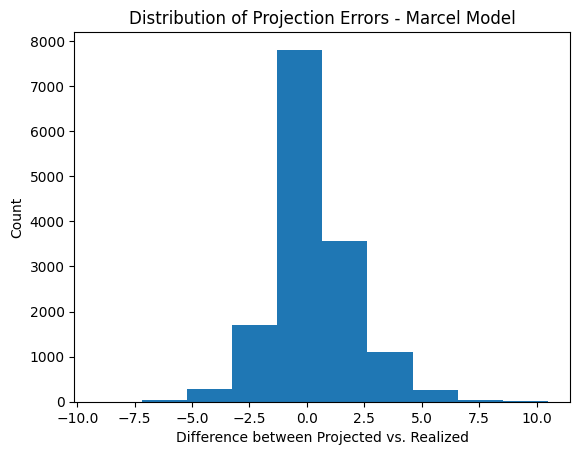

In [16]:
# plt.hist(df_goalies['DELTA_PS'])
# plt.show()
plt.hist(df_skaters['DELTA_PS'][df_skaters["SEASON"] >= 2003])
plt.xlabel("Difference between Projected vs. Realized")
plt.ylabel("Count")
plt.title("Distribution of Projection Errors - Marcel Model")
plt.show()

In [34]:
def score_monkey_reg(df: pd.DataFrame) -> None:
    # Assuming y_true is the true values and y_pred is the predicted values
    y_true = df['PS']
    y_pred = df['FORECAST_PS']

    # Calculate MAE
    mae = mean_absolute_error(y_true, y_pred)
    print(f"MAE: {mae}")

    # Calculate R^2
    r2 = r2_score(y_true, y_pred)
    print(f"R^2: {r2}")

print("For goalies:")
score_monkey_reg(df_goalies)
print("For skaters:")
score_monkey_reg(df_skaters)

For goalies:
MAE: 2.27339579653548
R^2: 0.47211369913957935
For skaters:
MAE: 1.247938221826694
R^2: 0.6169275827104387
